# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Imports and Loading in Data 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

from model import *
import joblib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
heart_df = pd.read_csv('./Data/heart_df.csv')

In [4]:
heart_df

,Unnamed: 0,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,NaN,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,NaN,NaN,NaN,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397142,401953,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,NaN,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397143,401954,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397144,401955,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397145,401956,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,NaN,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [5]:
heart_df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,NaN,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,NaN,NaN,NaN,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397142,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,NaN,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397143,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397144,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
397145,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,NaN,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [7]:
#makes no sense to have due to business problem
heart_df.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors', \
                         'no_doc_bc_cost'], inplace = True)

In [8]:
X = heart_df.drop(columns = ['heart_disease', 'state'])
y = heart_df.heart_disease

# Preprocessing and Model Prep

In [9]:
#train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42)

In [10]:
y_train.value_counts(normalize = True)

0.0    0.917102
1.0    0.082898
Name: heart_disease, dtype: float64

Our target is heavily imbalance. As such I will need to SMOTE and use the imblearn version of pipelines. I will smote up to 15%. 

#### Column Transformers

column transformer Pipelines will be built to prevent data leakage when we are doing cross validation as we need to scale and one-hot-encode our features. Different column transformers will be made as we will see how our model does with different amount of features.

In [11]:
X_train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret
147150,3.0,0.0,2.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,86.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0
95377,1.0,0.0,0.0,1.0,1.0,2.0,8.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,80.0,152.0,2.0,2.0,3.0,3.0,2.0,2.0
100216,3.0,0.0,0.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,91.0,175.0,2.0,1.0,3.0,4.0,2.0,1.0
376829,3.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,64.0,168.0,2.0,1.0,1.0,9.0,2.0,2.0
197380,3.0,0.0,NaN,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,62.0,173.0,2.0,2.0,3.0,17.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,3.0,0.0,0.0,NaN,3.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,91.0,163.0,2.0,2.0,3.0,20.0,2.0,NaN
275755,1.0,0.0,2.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,160.0,2.0,2.0,3.0,0.0,2.0,2.0
219795,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,86.0,185.0,2.0,2.0,3.0,0.0,2.0,2.0
41423,1.0,0.0,2.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,75.0,170.0,2.0,2.0,3.0,3.0,2.0,2.0


In [12]:
X_train.physical_health.value_counts()

0.0     207250
30.0     18206
2.0      13193
1.0       9250
3.0       7663
5.0       6736
10.0      4949
15.0      4598
7.0       4214
4.0       4065
20.0      2993
14.0      2610
6.0       1147
25.0      1043
8.0        861
21.0       599
12.0       566
28.0       415
29.0       197
9.0        164
18.0       152
16.0       125
27.0       116
17.0        95
11.0        88
13.0        81
22.0        78
24.0        63
26.0        50
23.0        47
19.0        31
Name: physical_health, dtype: int64

In [13]:
continous = ['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg', \
               'height_m', 'alcohol_consumption_30']

categorical = list(X.columns.drop(continous))

In [14]:
categorical

['general_health',
 'health_insurance',
 'stroke',
 'asthma',
 'skin_cancer',
 'other_cancer',
 'copd_type_issue',
 'arthritis_anyform',
 'depressive_disorder',
 'kidney_disease',
 'diabetes',
 'difficulty_walking',
 'smoke100_lifetime',
 'smokeless_tobacco_products',
 'high_risk_situations',
 'ecigaret']

In [15]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator = KNeighborsClassifier(),\
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(estimator = BayesianRidge(),random_state=42)),
                              ('scale', MinMaxScaler())])

In [16]:
#ct for only continous
ct_continous = ColumnTransformer(transformers=[
    ('scale', scale_pipe, continous)
])

#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])

#ct with both continous and categorical
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
])

# Simple Models

## Dummy Classifier

In [17]:
X_simple = X_train[continous]
y_simple = y_train

X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
147150,0.0,2.0,1.0,1.0,6.0,86.0,168.0,0.0
95377,0.0,0.0,1.0,2.0,8.0,80.0,152.0,3.0
100216,0.0,0.0,2.0,1.0,8.0,91.0,175.0,4.0
376829,2.0,0.0,4.0,1.0,4.0,64.0,168.0,9.0
197380,0.0,NaN,1.0,1.0,6.0,62.0,173.0,17.0
...,...,...,...,...,...,...,...,...
15342,0.0,0.0,3.0,2.0,8.0,91.0,163.0,20.0
275755,0.0,2.0,1.0,1.0,6.0,NaN,160.0,0.0
219795,0.0,0.0,1.0,1.0,8.0,86.0,185.0,0.0
41423,0.0,2.0,1.0,1.0,8.0,75.0,170.0,3.0


In [18]:
dummy_simple = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple, y_simple)

In [19]:
dummy_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

 
  f1_score is 0.0 CV Results for `dummy` model:
            0.91710 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025C09BBE0D0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025C09BBE700>


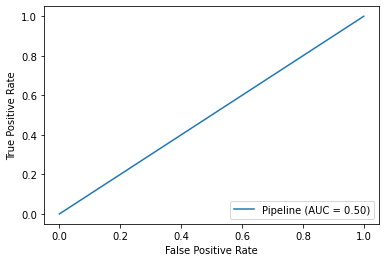

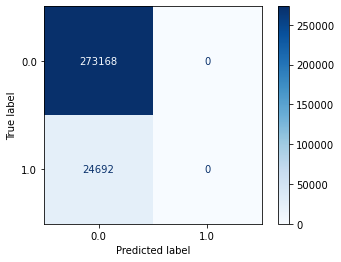

In [20]:
dummy_info.print_summary()

## Simple Model 1 - Logistic Regression

In [21]:
log1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple, y_simple)

In [22]:
log1_info = ModelWithCV(log1, 'log1', X_simple, y_simple)

 
  f1_score is 0.1394317228150102 CV Results for `log1` model:
            0.90357 ± 0.00075 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025C09B23820> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025C09B23640>


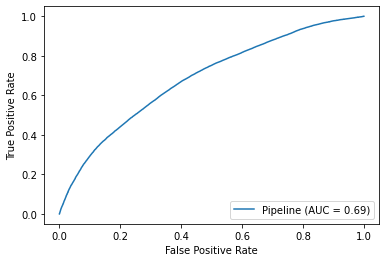

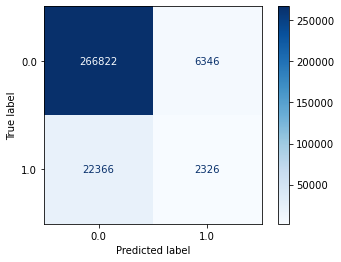

In [23]:
log1_info.print_summary()

The LogisticRegression has a better F1 score of .14 compared to the dummy classifier which had a F1 score of 0. The ROC-AUC score is also better by 0.19. The AUC of the logistic regression is 0.69 while the dummy was 0.50. However, the accuracy is slightly lower by 1-2% on the logistic regression (90%) compared to the dummy (92%).

## Simple Model 2 - KNN

In [24]:
knn1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn1',KNeighborsClassifier())
]).fit(X_simple, y_simple)

In [25]:
knn1_info = ModelWithCV(knn1, 'knn', X_simple, y_simple)

 
  f1_score is 0.47680012414649287 CV Results for `knn` model:
            0.85250 ± 0.00165 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025C1045FAC0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025C10047B80>


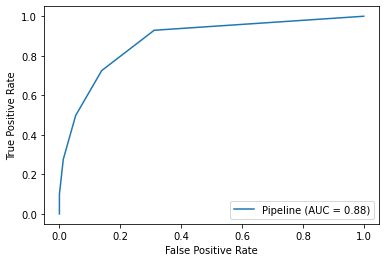

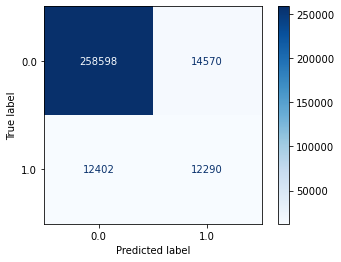

In [26]:
knn1_info.print_summary()

The KNN did much better compared to the logistic regression. It has a F1 score of about .50 compared to the logistic regression (0.14). The ROC-AUC is also much better at 0.89 versus 0.69. The accuracy is much lower though, dropping to about 84% compare to 90% from the logistic or even the dummy which was about 92%.

## Simple Model 3 - Decision Tree

In [27]:
dtree1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_simple, y_simple)

 
  f1_score is 0.7986492592328365 CV Results for `dtree1` model:
            0.85686 ± 0.00159 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025C1050EB50> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025C10078580>


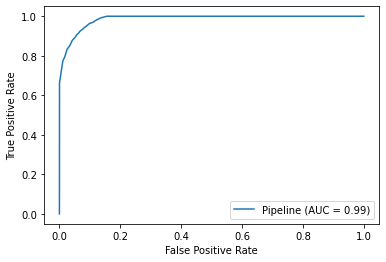

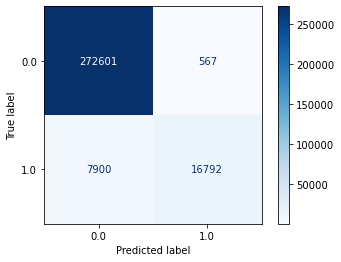

In [28]:
dtree1_info = ModelWithCV(dtree1, 'dtree1', X_simple, y_simple)
dtree1_info.print_summary()

Our decision tree performed much better with an F1 score of 0.80, ROC-AUC of 0.99 but with an accuracy of 86%. Though, the ROC-AUC being 0.99 indicates that it is more than likely overfit and as such we will have to take that into account.

# Simple Model 4 - XGBoost

In [29]:
xg1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg1', XGBClassifier(random_state= 42) )
]).fit(X_simple, y_simple)

 
  f1_score is 0.05201446469664316 CV Results for `xg1` model:
            0.91057 ± 0.00025 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000025C10D76100> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000025C10D76610>


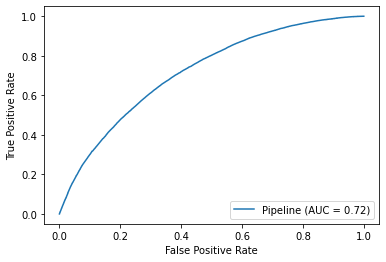

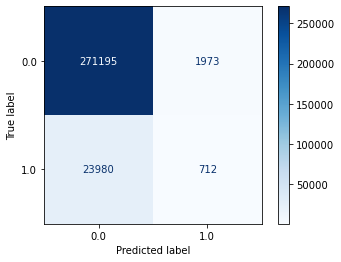

In [30]:
xg1_info = ModelWithCV(xg1, 'xg1', X_simple, y_simple)
xg1_info.print_summary()

# Grid Search on the Simple Models

In [31]:
### Logistic Regression

In [33]:
log1_params = {
    'log__C' : [10,100,1000],
    'log__max_iter' : [10,20,30],
    'log__penalty' : ['l1', 'l2'],
    'log__solver' : ['saga', 'liblinear']
}

In [ ]:
log_gs = GridSearchCV(estimator=log1, param_grid=log1_params, n_jobs=-1).fit(X_simple,y_simple)

In [ ]:
joblib.dump(log_gs, './joblib_models/log_gs.sav')

In [ ]:
log1_tune = ModelWithCV(log_gs.best_estimator_,'log1_tune', X_simple, y_simple)

In [ ]:
joblib.dump(log1_tune, './joblib_models/log1_tune.sav')

In [ ]:
log1_tune.print_summary()

### KNN

In [ ]:
# knn_params = {
#     'knn1__n_neighbors': [5,10,20],
#     'knn1__metric' : ['minkowski', 'euclidean']
# }

In [ ]:
# knn_gs = GridSearchCV(estimator=knn1, param_grid=knn_params, n_jobs=-1).fit(X_simple,y_simple)

In [ ]:
# joblib.dump(knn_gs, './joblib_models/knn_gs.sav')

In [ ]:
# knn1_tune = ModelWithCV(knn_gs.best_estimator_,'knn1_tune', X_simple, y_simple)

In [ ]:
# joblib.dump(knn1_tune, './joblib_models/knn1_tune.sav')

In [ ]:
# knn1_tune.print_summary()

### Decision Trees

In [ ]:
# dtree1_params = {
#     'dtree__criterion' : ['gini', 'entropy'],
#     'dtree__max_depth' : [5,10,20],
#     'dtree__min_samples_split' : [1000, 10000, 50000]
# }

In [ ]:
# dtree1.get_params().keys()

In [ ]:
# dtree1_gs = GridSearchCV(estimator=dtree1, param_grid=dtree1_params, n_jobs=-1, verbose=3).fit(X_simple,y_simple)

In [ ]:
# joblib.dump(dtree1_gs, './joblib_models/dtree1_gs.sav')

In [ ]:
# dtree1_tune = ModelWithCV(dtree1_gs.best_estimator_,'dtree1_tune', X_simple, y_simple)
# dtree1_tune.print_summary()

In [ ]:
# joblib.dump(dtree1_tune, './joblib_models/dtree1_tune.sav')

# More data input into models

## Logistic Model 2

In [ ]:
log2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log2',LogisticRegression(random_state=42, n_jobs= -1, verbose= 3))
]).fit(X_train, y_train)

In [ ]:
log2_info = ModelWithCV(log1, 'log2', X_train, y_train)

In [ ]:
log2_info.print_summary()

## KNN

In [ ]:
knn2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn2',KNeighborsClassifier( n_jobs= -1))
]).fit(X_train, y_train)

In [ ]:
knn2_info = ModelWithCV(knn2, 'knn2', X_train, y_train)

In [ ]:
knn2_info.print_summary()

## Decision Tree

In [ ]:
dtree2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree2', DecisionTreeClassifier(random_state=42) )
]).fit(X_train, y_train)

In [ ]:
dtree2_info = ModelWithCV(dtree2, 'dtree2', X_train, y_train)

In [ ]:
dtree2_info.print_summary()

## XGBoost

In [ ]:
xg2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg2', XGBClassifier(random_state= 42) )
]).fit(X_train, y_train)

In [ ]:
xg2_info = ModelWithCV(xg2, 'xg2', X_train, y_train)

In [ ]:
xg2_info.print_summary()

# Grid search on these

In [ ]:
log2_params = {
    'log2__C' : [10,100,1000],
    'log2__max_iter' : [10,20,30],
    'log2__penalty' : ['l2', 'l1'],
    'log2__solver' : ['saga', 'liblinear']
}

In [ ]:
log2_gs = GridSearchCV(estimator=log2, param_grid=log2_params, n_jobs=-1, verbose=3).fit(X_train,y_train)

In [ ]:
joblib.dump(log2_gs, './joblib_models/log2_gs.sav')

In [ ]:
log2_tune = ModelWithCV(log2_gs.best_estimator_,'log2_tune', X_train, y_train)

In [ ]:
joblib.dump(log2_tune, './joblib_models/log2_tune.sav')

In [ ]:
log2_tune.print_summary()

## KNN

In [ ]:
knn2_params = {
    'knn1__n_neighbors': [5,10,20],
    'knn1__metric' : ['minkowski', 'euclidean']
}

In [ ]:
knn2_gs = GridSearchCV(estimator=knn2, param_grid=knn2_params, n_jobs=-1,verbose=3).fit(X_train,y_train)

In [ ]:
joblib.dump(knn2_gs, './joblib_models/knn2_gs.sav')

In [ ]:
knn2_tune = ModelWithCV(knn2_gs.best_estimator_,'knn2_tune', X_train, y_train)

In [ ]:
joblib.dump(knn2_tune, './joblib_models/knn2_tune.sav')

In [ ]:
knn2_tune.print_summary()

## Decision Tree

In [ ]:
dtree2_params = {
    'dtree2__criterion' : ['gini', 'entropy'],
    'dtree2__max_depth' : [2,4,6],
    'dtree2__min_samples_split' : [1000, 10000, 50000]
}

In [ ]:
dtree2_gs = GridSearchCV(estimator=dtree2, param_grid=dtree2_params, n_jobs=-1, verbose=3).fit(X_train,y_train)

In [ ]:
joblib.dump(dtree2_gs, './joblib_models/dtree2_gs.sav')

In [ ]:
dtree2_tune = ModelWithCV(dtree2_gs.best_estimator_,'dtree2_tune', X_train, y_train)

In [ ]:
joblib.dump(dtree2_tune, './joblib_models/dtree2_tune.sav')

In [ ]:
dtree2_tune.print_summary()